<a href="https://colab.research.google.com/github/minsikwu/AI-/blob/main/Midterm_ai4dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on AI for Deep Learning

- Name:  
- ID Number:  

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [ ]:
import tensorflow as tf
tf.keras.__version__

'2.8.0'

## Q1 We will use mnist data for Q1


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
x_train, x_test = x_train / 255.0, x_test / 255.0

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


#### (Q1-1) [15 points] Design your neural network model with the structure below

- We have three Dense layers. Follow the description below.
  - [10] Setup output sizes as 512, 100 and 10 for all three Dense layers.
  - [5] Setup appropriate activation layers such as relu, sigmoid, and softmax.

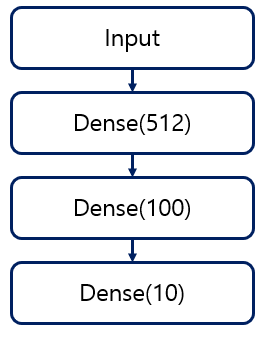

In [ ]:
from tensorflow.keras import layers, models

## Define your model here
model = 

#### (Q1-2) [10 points] Compile your model.  
 - Setup optimizer as 'RMSprop optimizer.'
 - Use categorical cross entropy loss.
 - Set your evaluation metric as 'accuracy.'

In [ ]:
model.compile(
### Define optimizer, loss, and metrics here


)


#### (Q1-3) [5 points] Seperate validation data from your training data. Set the number of validation data as 10000. Complete the code below.

In [ ]:
import numpy as np 

indices_permutation = np.random.permutation(60000)
shuffled_x_train = x_train[indices_permutation]
shuffled_train_labels = train_labels[indices_permutation]

num_validation_samples = 20000

## Complete the code below: 
val_x =   ## take first 20000 samples of shuffled_x_train 
val_labels = ## take first 20000 samples of shuffled_train_labels


trn_x = shuffled_x_train[num_validation_samples:]
trn_labels = shuffled_train_labels[num_validation_samples:]

#### (Q1-4) [10 points] Fit your model. 
- Use epoch size of 10, and batch size of 100.
- Use trn_x and trn_labels as training data
- Use val_x and val_labels as validation data 

In [ ]:
### Define how you fit your model

history = model.fit(
    ## Specify training data, validation data, epoch and batch size

    
    )

Epoch 1/20
400/400 [==============================] - 6s 7ms/step - loss: 0.2778 - accuracy: 0.9137 - val_loss: 0.1305 - val_accuracy: 0.9625
Epoch 2/20
400/400 [==============================] - 3s 6ms/step - loss: 0.1033 - accuracy: 0.9678 - val_loss: 0.1058 - val_accuracy: 0.9688
Epoch 3/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.1088 - val_accuracy: 0.9700
Epoch 4/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0832 - val_accuracy: 0.9776
Epoch 5/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0921 - val_accuracy: 0.9788
Epoch 6/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.1265 - val_accuracy: 0.9733
Epoch 7/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.1064 - val_accuracy: 0.9790
Epoch 

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_accuracy"]
trn_loss = history.history["accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation Accuracy")
plt.plot(epochs, trn_loss, "r-",
         label="Training Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### (Q1-5) [5 points] Code below listing five written digits from the test data. Use our trained model to test those images. (Hint: use model.predict )

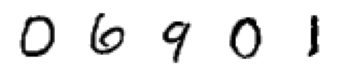

In [ ]:
tst_imgs = x_test[10:15,].reshape(5, 28,28)

import matplotlib.pyplot as plt

for i in range(5):
  ax = plt.subplot(1, 5, i + 1)
  plt.imshow(tst_imgs[i] , cmap=plt.cm.binary)
  plt.axis("off")


In [ ]:
## Define your prediction code here


## Q2 We will use the Boston housing data for Q2

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
train_data.shape

(404, 13)

#### (Q2-1) [5 points] Seperate validation data from your training data. Set the number of validation data as 54. Complete the code below.

In [ ]:
import numpy as np 

indices_permutation = np.random.permutation(404)
shuffled_x_train = train_data[indices_permutation]
shuffled_train_targets = train_targets[indices_permutation]

num_validation_samples = 54

## Complete the code below: 
val_x = ## take first 54 samples of shuffled_x_train 
val_targets = ## take first 54 samples of shuffled_train_targets 


trn_x = shuffled_x_train[num_validation_samples:]
trn_targets = shuffled_train_targets[num_validation_samples:]


#### (Q2-2) [10 points] Design your neural network model with the structure below

- We have three Dense layers. Follow the description below.
  - Setup output sizes as 300, 200 and 1 for all three Dense layers.
  - Setup appropriate activation layers (such as relu, sigmoid, softmax and None).

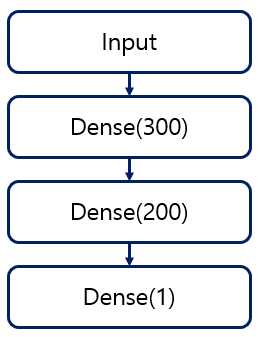

This time we will make a function (build_model) to define our model.

In [ ]:
def build_model():
    model = keras.Sequential([
## Define your layers here     

    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
model = build_model()

#### (Q2-2) [10 points] Fit your model. 
- Use epoch size of 200, and batch size of 30.
- Use trn_x and trn_targets as training data
- Use val_x and val_targets as validation data 

In [ ]:
history = model.fit(
    ## Specify training data, validation data, epoch and batch size
    
    )

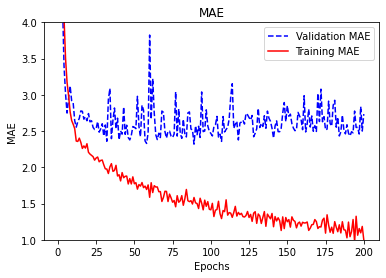

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 201)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,4])
plt.legend()

#### (Q2-3) [5 points] Evaluate your model on test data. 
- Report the MAE and MSE score on test data 

In [ ]:
## use model.evaluate to get MAE and MSE scores.


4/4 [==============================] - 0s 5ms/step - loss: 14.8011 - mae: 2.6264


#### (Q2-4) [10 points] Revise the model using dropout regularization with the structure below
- Add two dropout layers with rate 0.2. 

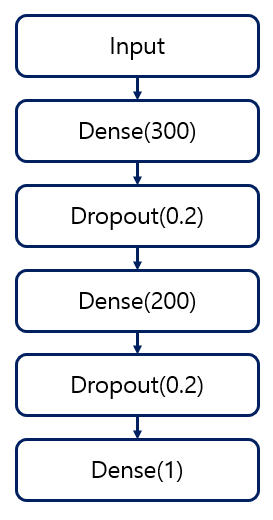

In [ ]:
def build_model_dropout():
    model = keras.Sequential([
## Define your model here     

    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
model_dr = build_model_dropout()

#### (Q2-5) [5 points] Fit your model. 
- Use epoch size of 200, and batch size of 30.
- Use trn_x and trn_targets as training data
- Use val_x and val_targets as validation data 

In [ ]:
history_dr = model_dr.fit(
    ## Specify training data, validation data, epoch and batch size

)

#### (Q2-6) [5 points] Modify the code below and Visualize the history of "val_mae" and "mae" for our new dropout model (model_dr).  

The result maybe look like below.  
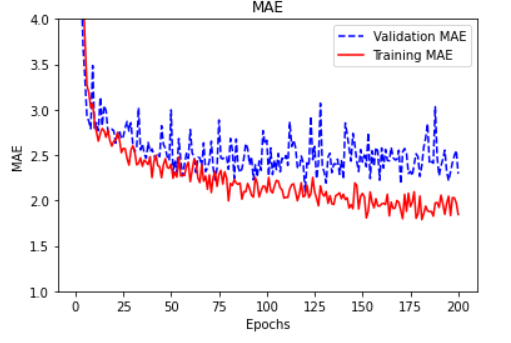

In [ ]:
## Modify the code below to visualize the his

import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 201)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,4])
plt.legend()

#### (Q2-7) [5 points] Evaluate your model on test data. 
- Report the MAE and MSE score on test data 

In [ ]:
## use model.evaluate to get MAE and MSE scores.

4/4 [==============================] - 0s 4ms/step - loss: 14.7977 - mae: 2.5753
